Accuracy: 1.0


Below is the Confusion Matrix: 



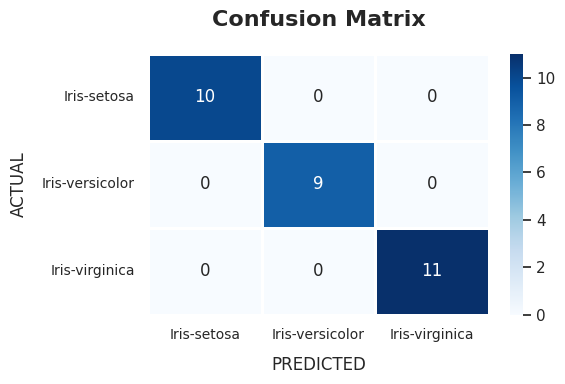



Below is the Classification Report: 



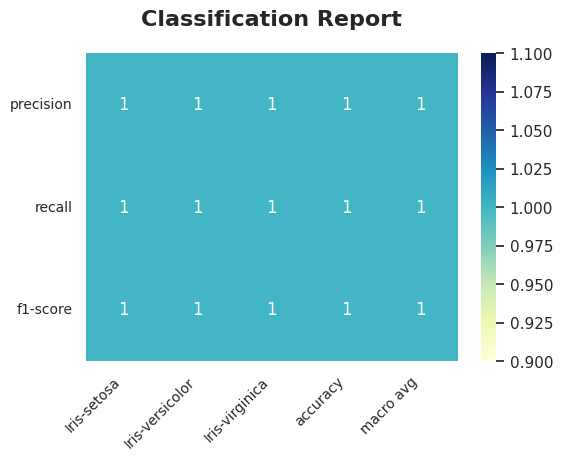



Below is the Error Rate vs K Plot: 



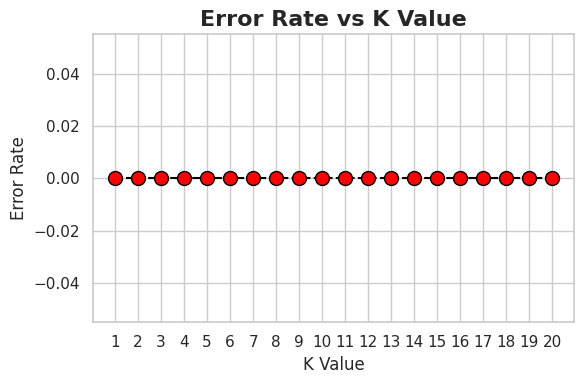

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset from a CSV file
data = pd.read_csv('IRIS.csv')

# Separate features and target variable
X = data.drop('species', axis=1)
y = data['species']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the trained model and scaler
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Print the model's accuracy
print(f"Accuracy: {accuracy}")
print("\n")

# Confusion Matrix
print("Below is the Confusion Matrix: \n")
sns.set_theme(style="whitegrid") # Set a clean theme for plots
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=2, xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel("PREDICTED", fontsize=12, labelpad=10)
plt.ylabel('ACTUAL', fontsize=12, labelpad=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()
print("\n")

# Classification Report
print("Below is the Classification Report: \n")
report = classification_report(y_test, y_pred, output_dict=True)
# Convert the classification report to a DataFrame for plotting
data_report = pd.DataFrame(report).iloc[:-1, :-1]

sns.set_theme(style="whitegrid") # Set a clean theme for plots
plt.figure(figsize=(6, 4))
sns.heatmap(data_report, annot=True, cmap='YlGnBu')
plt.title("Classification Report", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()
print("\n")

# Error Rate vs K Plot
print("Below is the Error Rate vs K Plot: \n")

# Initialize list to store error rates for different k values
error_rate = []

for k in range(1,21):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  pred_k = model.predict(X_test)
  error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(6,4))
plt.plot(range(1,21), error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value', fontsize=16, fontweight='bold')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()